In [2]:
# %load_ext autoreload
# %autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [3]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

In [4]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

/mnt/hdd/eric/.conda/envs/8.tmp.copied/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/mnt/hdd/eric/.conda/envs/8.tmp.copied/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /mnt/hdd/eric/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Setting up a new session...
Traceback (most recent call last):
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/connection.py", line 174, in _new_conn
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/util/connection.py", line 95, in create_connection
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/util/connection.py", line 85, in create_connection
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/connectionpool.py", line 715, in urlopen
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/connectionpool.py", line 416, in _make_request
  File "/mnt/hdd/eric/.local/lib/python3.8/site-packages/urllib3/connection.py", line 244, in request
  File "/mnt/hdd/eric/.conda/envs/8.tmp.copied/lib/python3.8/http/client.py", line 1256, in request
    self._send_reques

Exception in user code:
------------------------------------------------------------


You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

<Axes: >

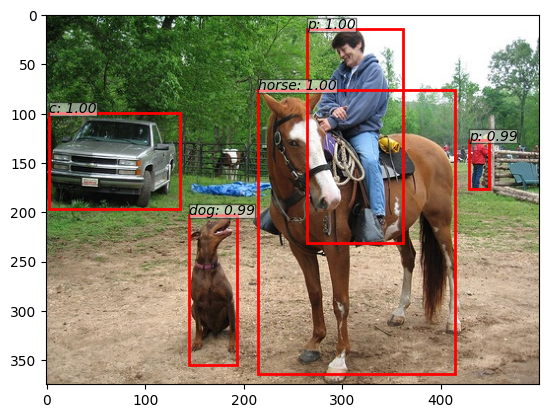

In [7]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/Faster_RCNN_/simple-faster-rcnn-pytorch/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth.712649824453')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

<Axes: >

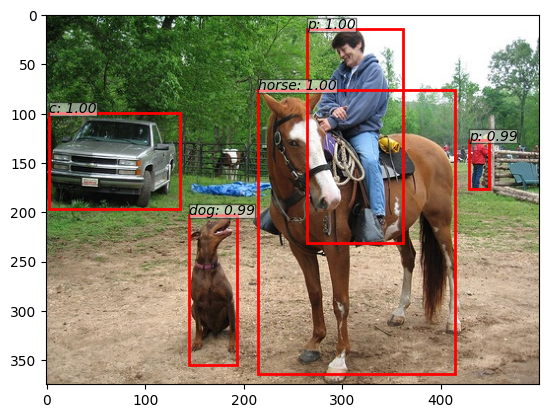

In [10]:
trainer.load('/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/Faster_RCNN_/simple-faster-rcnn-pytorch/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth.712649824453')
opt.caffe_pretrain=True # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

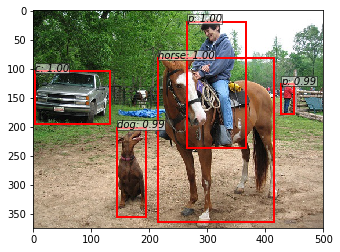

In [6]:
trainer.load('/home/cy/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))